In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [3]:
from scipy.io import wavfile
import numpy as np
import pylab as pl
import wavio
from sklearn.decomposition import FastICA

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

Read the wav file and convert to monoraul

In [4]:
rate, audio = wavfile.read("No Suprises.wav")

# try:
#     audio = np.mean(audio, axis=1)
# except:
#     print("mean function passed")


Audio length: 217.73 seconds


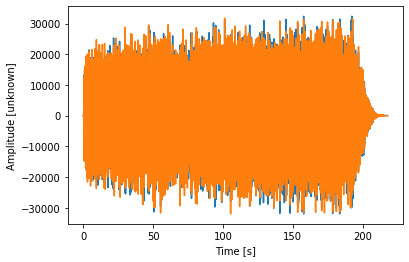

In [5]:
N = audio.shape[0]
L = N / rate

print(f'Audio length: {L:.2f} seconds')

f, ax = plt.subplots()
ax.plot(np.arange(N) / rate, audio)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude [unknown]');

Create the spectrogram of the audio file

In [6]:
M = 1024
freqs, times, mixed_spectro = signal.spectrogram(np.mean(audio, axis=1), fs=rate, window='hanning',nperseg=1024, noverlap=M - 100, scaling='spectrum')

Do some data normalization so that spectrogram looks good

In [7]:
mixed_spectro = np.log10( mixed_spectro + 1)
mixed_spectro = ( mixed_spectro - np.min( mixed_spectro))/np.ptp( mixed_spectro) 
mixed_spectro = 255 *  mixed_spectro
mixed_spectro =  mixed_spectro.astype(np.uint8)

Display the spectrogram

Text(0.5, 0, 'Time [s]')

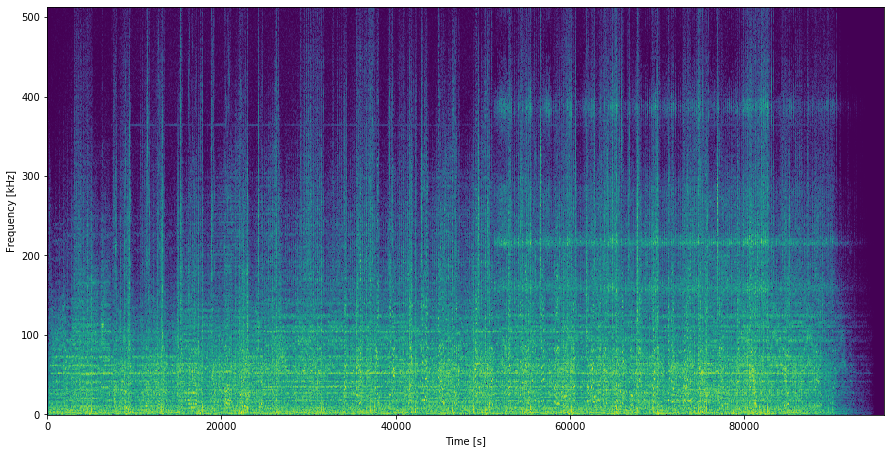

In [8]:
f, ax = plt.subplots(figsize=(15, 7.5))
plt.imshow(mixed_spectro,aspect='auto')
ax.invert_yaxis()

ax.set_ylabel('Frequency [kHz]')
ax.set_xlabel('Time [s]')

Use spleeter to seperate the 

In [9]:
from spleeter.separator import Separator

import warnings
warnings.filterwarnings('ignore')

# Using embedded configuration... stems can be 2 - 5 (number of instruments in network)
separator = Separator('spleeter:5stems')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/

In [10]:
# Perform the separation
prediction = separator.separate(audio)

INFO:spleeter:Downloading model archive https://github.com/deezer/spleeter/releases/download/v1.4.0/5stems.tar.gz
INFO:spleeter:Validating archive checksum
INFO:spleeter:Extracting downloaded 5stems archive
INFO:spleeter:5stems model file(s) extracted


INFO:tensorflow:Using config: {'_model_dir': 'pretrained_models/5stems', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': gpu_options {
  per_process_gpu_memory_fraction: 0.7
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x13ef08240>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

INFO:tensorflow:Apply unet for vocals_spectrogram
INFO:tensorflow:Apply unet for piano_spectrogram
INFO:tensorflow:Apply unet for drums_spectro

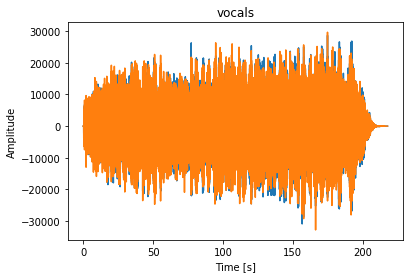

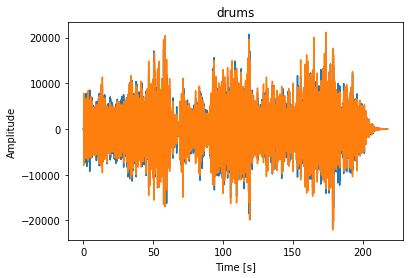

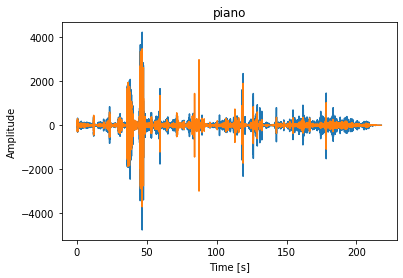

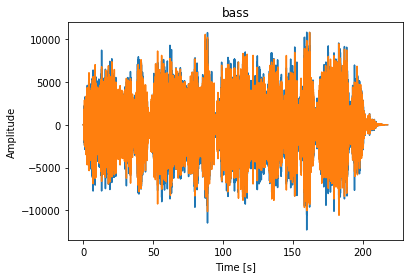

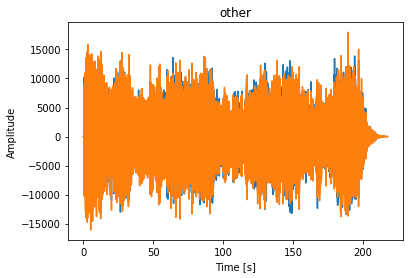

In [17]:
for instrument in prediction:
    
    N = prediction[instrument].shape[0]
    L = N / rate
    
    f,ax = plt.subplots()
    ax.set_title(instrument)
    ax.plot(np.arange(N)/rate,prediction[instrument])
    ax.set_xlabel('Time [s]')
    ax.set_ylabel('Amplitude')
    

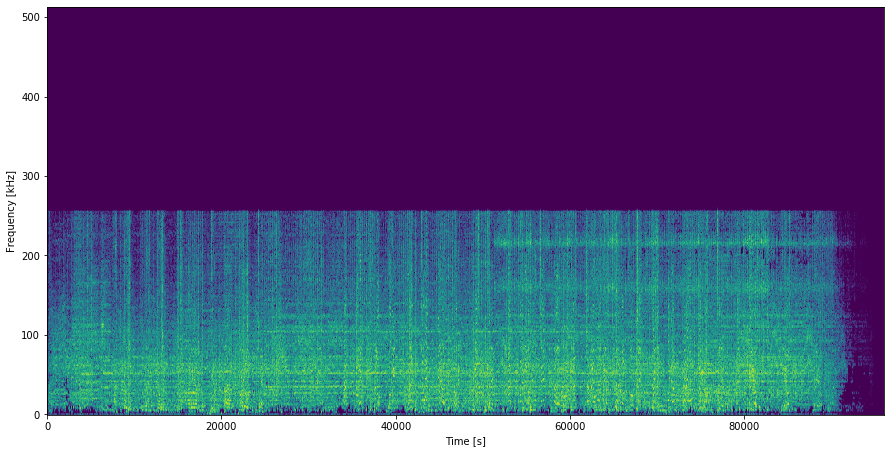

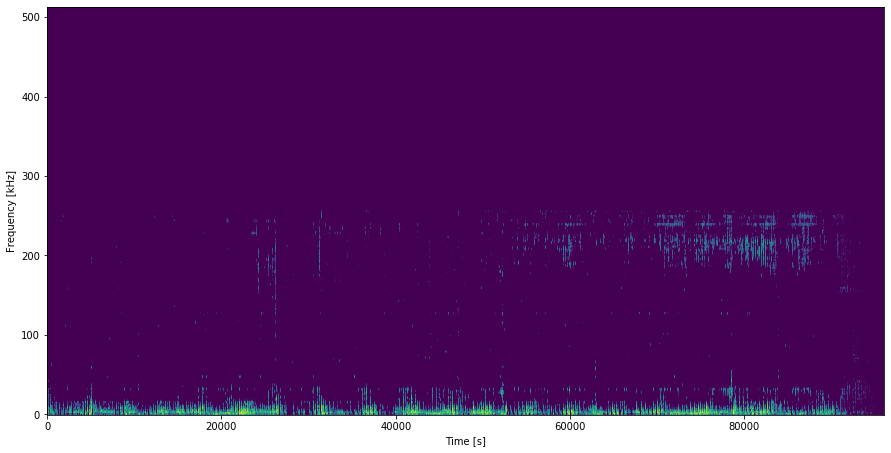

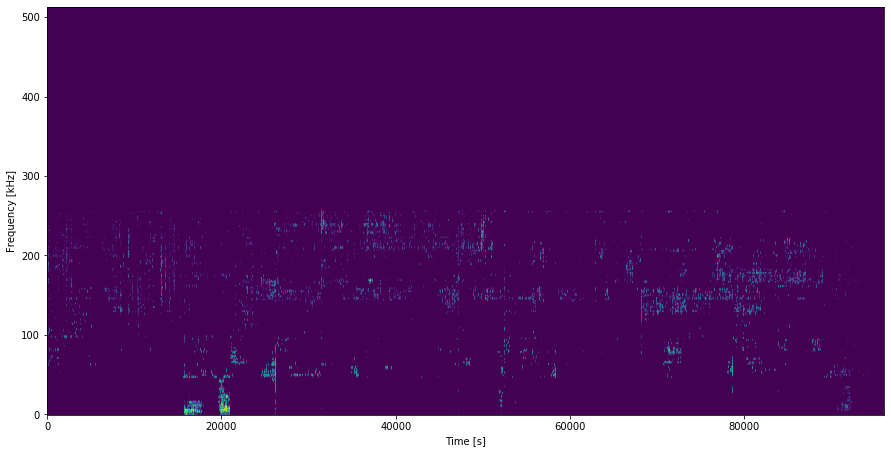

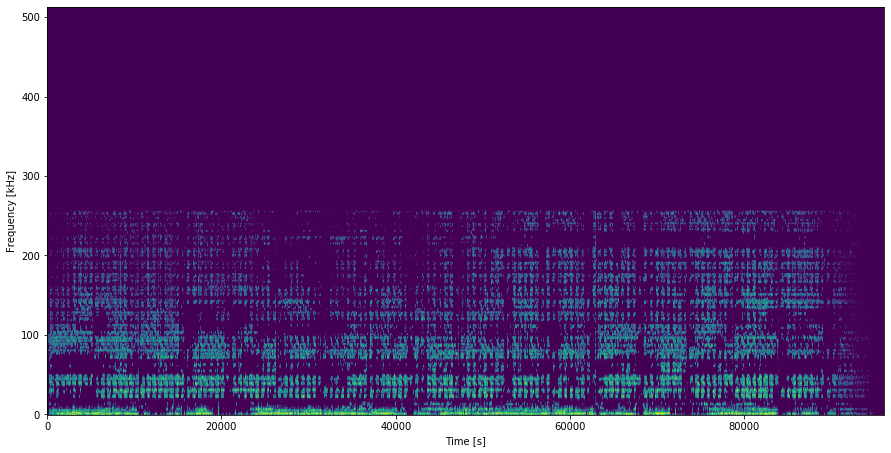

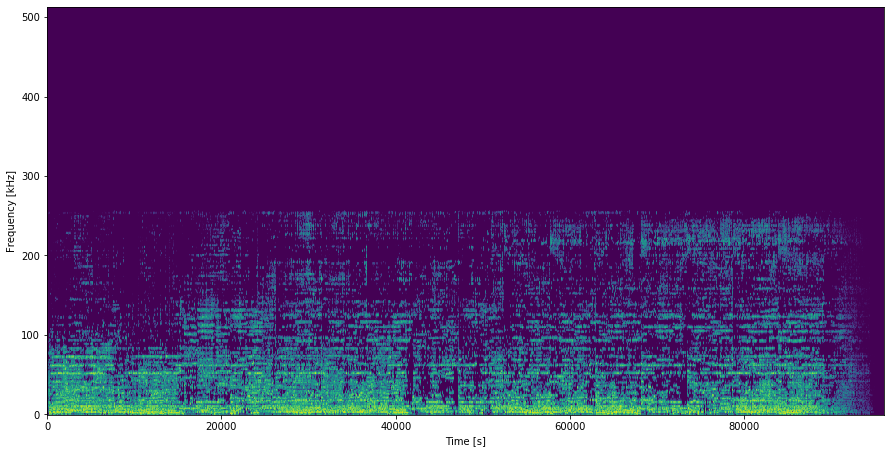

In [14]:
for instrument in prediction:
    freqs, times, instrument_spectro = signal.spectrogram(np.mean(prediction[instrument],axis=1), fs=rate, window='hanning',nperseg=1024, noverlap=M - 100, scaling='spectrum')
    instrument_spectro = np.log10( instrument_spectro + 1)
    instrument_spectro = ( instrument_spectro - np.min( instrument_spectro))/np.ptp( instrument_spectro) 
    instrument_spectro = 255 *  instrument_spectro
    instrument_spectro =  instrument_spectro.astype(np.uint8)
    
    f, ax = plt.subplots(figsize=(15, 7.5))
    plt.imshow(instrument_spectro,aspect='auto')
    ax.invert_yaxis()
    ax.set_title(instrument)
    ax.set_ylabel('Frequency [kHz]')
    ax.set_xlabel('Time [s]')

In [22]:
import wavio

rate = 44100

for instrument in prediction:
    print("Saving",instrument)
    
    name = "SpleeterOutputs/" + instrument +".wav"
    
    print("Saving:",name)

    wavio.write(name, prediction[instrument], rate, sampwidth=4)

Saving vocals
Saving drums
Saving piano
Saving bass
Saving other
